## Predicting Bike Rentals

THe data set below was compiled at the University of Porto where each ro represents the number of bike rentals for a single hour of a single day. Washington DC has a communal bike sharing system where you can rent bicycles by the hour or day. This system collects detailed data on the number of bicycles people rent by the hour and day.

* **instant** - A unique sequential ID number for each row
* **dteday** - The date of the rentals
* **season** - The season in which the rentals occurred
* **yr** - The year the rentals occurred
* **mnth** - The month the rentals occurred
* **hr** - The hour the rentals occurred
* **holiday** - Whether or not the day was a holiday
* **weekday** - The day of the week (as a number, 0 to 7)
* **workingday** - Whether or not the day was a working day
* **weathersit** - The weather (as a categorical variable)
* **temp** - The temperature, on a 0-1 scale
* **atemp** - The adjusted temperature
* **hum** - The humidity, on a 0-1 scale
* **windspeed** - The wind speed, on a 0-1 scale
* **casual** - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
* **registered** - The number of registered riders (people who had already signed up)
* **cnt** - The total number of bike rentals (casual + registered)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')

bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
bike_rentals.shape

(17379, 17)

In [3]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


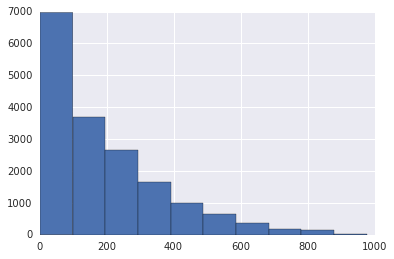

In [5]:
plt.hist(bike_rentals['cnt'])
plt.show()

In [9]:
bike_rentals.corr()['cnt'].sort_values(ascending=True)

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

### Feature Engineering

It can often be helpful to calculate features before applying machine learning models. Features can enhance the accuracy of models by introducing new information or distilling existing information.

In [11]:
# Transforming a 24 hour time system to something resembling categorical

def assign_label(x):
    if x > 6 and x <= 12:
        return 1
    elif x> 12 and x <= 18:
        return 2
    elif x> 18 and x <= 24:
        return 3
    elif x >=0 and x <=6:
        return 4

In [12]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

In [14]:
# Check results

bike_rentals[['hr','time_label']].head()

,hr,time_label
0,0,4
1,1,4
2,2,4
3,3,4
4,4,4


In [15]:
# Since the values are integers

bike_rentals['cnt'].value_counts()

5      260
6      236
4      231
3      224
2      208
7      198
8      182
1      158
10     155
11     147
9      128
12     122
13     113
16     105
17     102
14      97
20      91
21      90
26      90
15      89
28      85
23      81
18      79
24      76
31      75
25      72
27      71
19      69
32      68
36      67
      ... 
754      1
977      1
913      1
897      1
865      1
849      1
708      1
804      1
792      1
948      1
728      1
696      1
967      1
863      1
871      1
775      1
727      1
870      1
854      1
806      1
774      1
758      1
630      1
917      1
901      1
725      1
709      1
661      1
629      1
887      1
Name: cnt, Length: 869, dtype: int64

In [16]:
# Create a training set
# Return a random sample of items from an axis of object.
train = bike_rentals.sample(frac=0.80, replace=False)

In [17]:
# Generate a test set that is not in train
bike_rentals.index.isin(train.index)

array([ True,  True,  True, ...,  True, False,  True])

In [19]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [20]:
train.shape

(13903, 18)

In [21]:
test.shape

(3476, 18)

Linear regression works fairly well on this data, given that many of the columns are highly correlated with cnt

In [25]:
# Predictor columns
features = ['weekday', 'workingday', 'windspeed', 'mnth', 'season', 'yr', 
           'instant', 'hr', 'atemp', 'temp']

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()

In [27]:
lr.fit(train[features], train['cnt'])

# Make predictions
predictions = lr.predict(test[features])

# Find the error between predictions and actual values
rmse = np.sqrt(mean_squared_error(predictions, test['cnt']))
print(rmse)

147.84920968608793


### Compare results to a Descision Tree Model

Decision trees tend to predict outcomes much more reliably than linear regression models, because a decision tree is a fairly complex model, it also tends to overfit, particularly when we don't tweak parameters like maximum depth and minimum number of samples per leaf. Decision trees are also prone to instability -- small changes in the input data can result in a very different output model.

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
tree = DecisionTreeRegressor()

tree.fit(train[features], train['cnt'])

# Make predictions
predictions_tree = tree.predict(test[features])

# Find the error between predictions and actual values
rmse_tree = np.sqrt(mean_squared_error(predictions_tree, test['cnt']))
print(rmse_tree)

62.26631341231689


In [31]:
n_leafs = [1,2,3,4,5,6,7]

for leaf in n_leafs:
    tree = DecisionTreeRegressor(min_samples_leaf = leaf)

    tree.fit(train[features], train['cnt'])

    # Make predictions
    predictions_tree = tree.predict(test[features])

    # Find the error between predictions and actual values
    rmse_tree = np.sqrt(mean_squared_error(predictions_tree, test['cnt']))
    print(rmse_tree)

61.27577074629383
60.26681288616334
58.53188836755577
58.24586932798568
57.8618899173008
57.90646295792902
56.657803697759064


### Compare results to Random Forest

You can now apply the random forest algorithm, which improves on the decision tree algorithm. Random forests tend to be much more accurate than simple models like linear regression. Due to the way random forests are constructed, they tend to overfit much less than decision trees. Random forests are prone to overfitting, so it's important to tune parameters like maximum depth and minimum samples per leaf.

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
forest = RandomForestRegressor()

forest.fit(train[features], train['cnt'])

# Make predictions
predictions_forest = forest.predict(test[features])

# Find the error between predictions and actual values
rmse_forest = np.sqrt(mean_squared_error(predictions_forest, test['cnt']))
print(rmse_forest)

49.88699837075978


In [34]:
n_leafs = [1,2,3,4,5,6,7]

for leaf in n_leafs:
    forest = RandomForestRegressor(min_samples_leaf=leaf)

    forest.fit(train[features], train['cnt'])

    # Make predictions
    predictions_forest = forest.predict(test[features])

    # Find the error between predictions and actual values
    rmse_forest = np.sqrt(mean_squared_error(predictions_forest, test['cnt']))
    print(rmse_forest)

50.175036458974084
49.813967570938495
50.18811946468436
50.9663265359914
51.53732569734345
52.55578290276556
53.3167529616663


The Random Forest model demonstrated that two leaves leads to the least number of errors